## Linear Regression

#### TL;DR

In [1]:
from sklearn.linear_model import LinearRegression # Algorithm
from sklearn.metrics import mean_squared_error    # Metric

In [2]:
ALG = LinearRegression( 
                        fit_intercept=True, # Intercept
                        normalize=False, # Normalized regressors, substract the mean, divide by l2-norm.
                        copy_X=True, # X will be copied; else, it may be overwritten.
                        n_jobs=None, # Speedup for n_targets > 1 and sufficient large problems.
                       )
ALG

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 1. Example with code

In [3]:
# Load cleaned and preprocessed CSV file as a dataframe.
# ------------------------------------------------------
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

fp = os.path.join('', 'tweets_sentiment.csv')    # Open file
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

<b>Example problem</b>: Predict tweet sentiment basing on it's  nr of hashtags, retweet and like counts. 

<b>Example data</b>: consists of 3800 tweets obtained by twitter search API on phrases like psychology + AI (and simillar) saved and cleaned previously as a tweets_sentiment.csv file. Features:

In [4]:
df.head(3)

,tweet,hashtags,hashtags_number,likes,retweets,sentiment,sentiment_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,2,0,7,0.2200,Positive
1,windy interview really groundbreaking can t wr...,interview groundbreaking. head DeepState reali...,6,0,3,0.2000,Positive
2,ai s top researchers think artificial general ...,ai’s ai artificialintelligence agi human,5,1,0,-0.0125,Negative


- <b>tweet</b>           - tweet text.
- <b>hashtags</b>        - #hashtags in a tweet.
- <b>hashtags_number</b> - number of hashtags.
- <b>likes</b>           - number of tweet likes 
- <b>retweets</b>        - number of times tweet have been shared.
- <b>sentiment</b>       - score in range: -1.0 to 1.0 .
- <b>sentiment_class</b> - score simplified to: Positive ( > 0) and Negative ( < 0).

<b>Example code:</b>

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [-2.78234501e-04  2.24811635e+00]
Intercept:  3.885496423568955


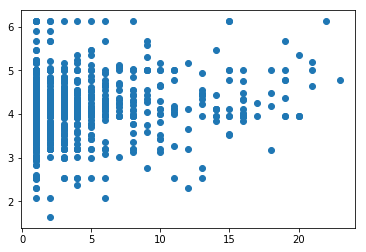

In [5]:
# Linear Regression.
# ------------------

# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['hashtags_number','retweets']] # features
y =  df.loc[ :, 'sentiment'] # label, value to predict

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Linear Regression.
LR = LinearRegression( fit_intercept=True, # Calculate the intercept.
                       normalize=True, # Normalized regressors (substract the mean, divide by l2-norm).
                       copy_X=True, # X will be copied; else, it may be overwritten.
                       n_jobs=None) # If more complex data, might result on speed.

# Fit data into model.
LR.fit(X_train, y_train, sample_weight=None)

# Results.
coef = LR.coef_
intercept = LR.intercept_
r_squared_train = round(LR.score(X_train, y_train), 2)
r_squared_test  = round(LR.score(X_test,  y_test), 2)
predictions = LR.predict(X_test) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 2. Key info
- Linear model
- Find coefficients, most optimal weights and bias for input features.
- Model decides on base of metric: MSE, MAE
- Before: remove noise and very correlated variables
- Well known and understood
- Optimised (fg. GD) provides good performance on large number of features. Good for text data, as n-grams.
- Fundament for many algorithms and building block of Multiple Linear Regression.
- can use fg. gradient descent optimization (more efficent in case of many features) or linear algebra solution ordinary least squares.
-  Regularisations: Ridge, Lasso (anti overfitting fg. by adding to loss function two sums: of modules weights and squares of weights).
- [ADD MORE],
- (To be updated.)

### 3. Quick use template

R-squared - train: 0.02
R-squared - test:  0.02
Coefficient: [-2.78234501e-04  2.24811635e+00]
Intercept:  3.8854964235689544
First three predictions (of 950): [4.03877708 5.00871989 3.96043364] ...


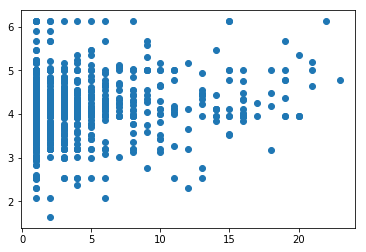

In [13]:
import os # Get file
import pandas as pd # Read as pandas table; dataframe (df).
from sklearn.model_selection import train_test_split # Train/Test set divide.
from sklearn.linear_model import LinearRegression # Algorithm
from sklearn.metrics import mean_squared_error # Metric
import matplotlib.pyplot as plt # Plots

# You fill three lines below.
# ---------------------------
file_name   = 'your file_name.csv' # csv file in same dir  as this notebook.
predit_what = 'column_name' # The label to predict.
based_on    = ['column_name', 'column_name'] # The features to use in this quest.

# Modify if you want to specify full file path / use existing dataframe. 
fp = os.path.join('', file_name) # fp = 'home/data/file_path.csv'
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # df = my_df 


# Linear Regression.
# ------------------

# Divide data into features(X) and labels(y).
X =  df.loc[ :, based_on]    # features
y =  df.loc[ :, predit_what] # label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Load and define Linear Regression.
LR = LinearRegression( fit_intercept=True, # Calculate the intercept.
                       normalize=False, # Normalized regressors (substract the mean, divide by l2-norm).
                       copy_X=True, # X will be copied; else, it may be overwritten.
                       n_jobs=None) # If more complex data, might result on speed.

# Fit data into model.
LR.fit(X_train, y_train, sample_weight=None)

# Results.
coef = LR.coef_
intercept = LR.intercept_
r_squared_train = round(LR.score(X_train, y_train), 2)
r_squared_test  = round(LR.score(X_test,  y_test), 2)
predictions = LR.predict(X_test) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### Nobody aint got time for comments?

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

fp = os.path.join('', 'your file_name.csv')
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

X =  df.loc[ :, ['feature_column_name', 'feature_column_name']]
y =  df.loc[ :, 'label_column_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LR = LinearRegression(normalize=True).fit(X_train, y_train)

coef = LR.coef_
intercept = LR.intercept_
r_squared_train = round(LR.score(X_train, y_train), 2)
r_squared_test  = round(LR.score(X_test,  y_test), 2)
predictions = LR.predict(X_test)

print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 4. More

To be updated.

By Luke, 13 II 2019.